In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Cleaned_Quantium_Merged_Dataset.csv')

In [4]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHTSg,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  object 
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   WEIGHTSg          264835 non-null  int64  
 9   LIFESTAGE         264835 non-null  object 
 10  PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 22.2+ MB


In [6]:
df["DATE"] = pd.to_datetime(df["DATE"])
df["YEARMONTH"] = df["DATE"].dt.strftime("%Y%m").astype("int")

METRICS UNDER CONSIDERATION:

* Monthly overall sales revenue
* Monthly number of customers
* Monthly number of transactions per customer

Using a def function to create a new column that would show if the product bought is either small, medium or large based on the product quality 

In [7]:
def size(number):
    if number < 100:
        return 'Small'
    if number >= 100 and number < 200:
        return 'Medium'
    if number >= 200:
        return 'Large'

In [8]:
df['PROD_SIZE']=df['PROD_QTY'].apply(size)

In [9]:
df['product_price'] = df['TOT_SALES'] / df['PROD_QTY']

In [10]:
df['MONTH'] = df['DATE'].dt.month_name()

In [11]:
df['YEAR'] = df['DATE'].dt.year

Creating a column from the product name that would show the brand name

In [12]:
def Brand_name(a):
    b=a.split(" ")
    Brand=b[0]
    
    return Brand

In [13]:
df['BRAND NAME']=df['PROD_NAME'].apply(Brand_name)

Creating a column that would show the age group of the customers

In [14]:
def age_cat(a):
    b=a.split(" ")
    Age=''
    if b[0]=='NEW':
        Age='MIDAGE';
    elif b[0]=='RETIREES':
        Age='OLDER'
    else:
        Age=b[0]
    return Age

In [15]:
df['AGE CATEGORY']=df['LIFESTAGE'].apply(age_cat)

In [16]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHTSg,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH,PROD_SIZE,product_price,MONTH,YEAR,BRAND NAME,AGE CATEGORY
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,YOUNG SINGLES/COUPLES,Premium,201810,Small,3.00,October,2018,Natural,YOUNG
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget,201905,Small,2.10,May,2019,CCs,MIDAGE
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,MIDAGE SINGLES/COUPLES,Budget,201811,Small,1.90,November,2018,WW,MIDAGE
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,MIDAGE SINGLES/COUPLES,Budget,201903,Small,2.10,March,2019,CCs,MIDAGE
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget,201905,Small,1.45,May,2019,Smiths,MIDAGE


<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='count'>

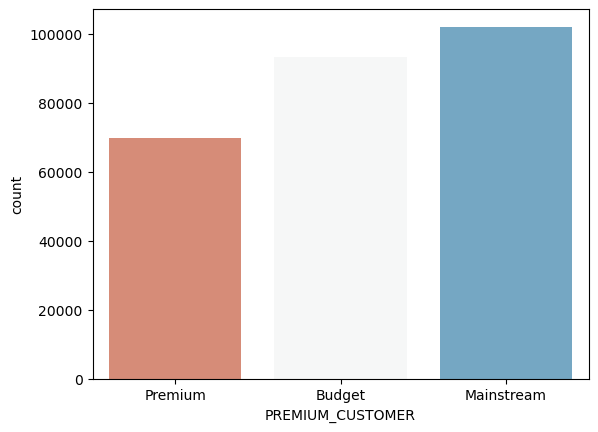

In [17]:
sns.countplot(x='PREMIUM_CUSTOMER', data=df,palette="RdBu")

### check the comparison between PACK_SIZE and PROD_QTY

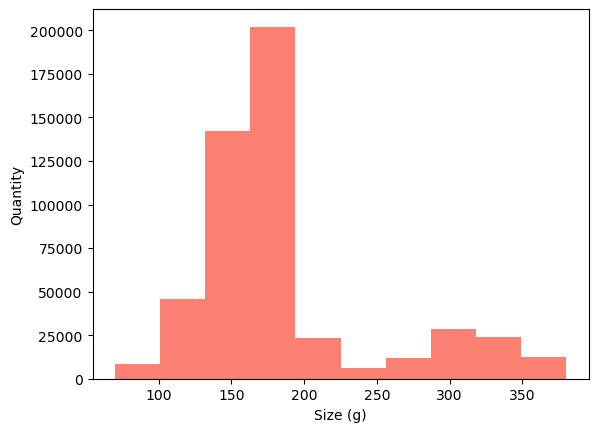

In [18]:
plt.hist(df['WEIGHTSg'], weights=df['PROD_QTY'], fc='salmon');
plt.xlabel('Size (g)');
plt.ylabel('Quantity');

<AxesSubplot:xlabel='count', ylabel='LIFESTAGE'>

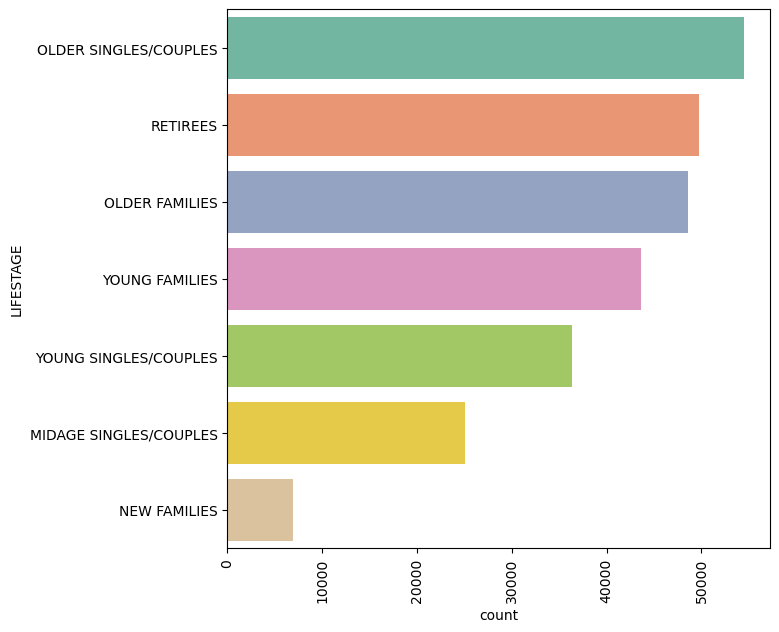

In [19]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(y='LIFESTAGE', data=df,order=df['LIFESTAGE'].value_counts().index, palette="Set2")
     

### To check for month with the highest sales

C:\Users\Temitope\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MONTH', ylabel='TOT_SALES'>

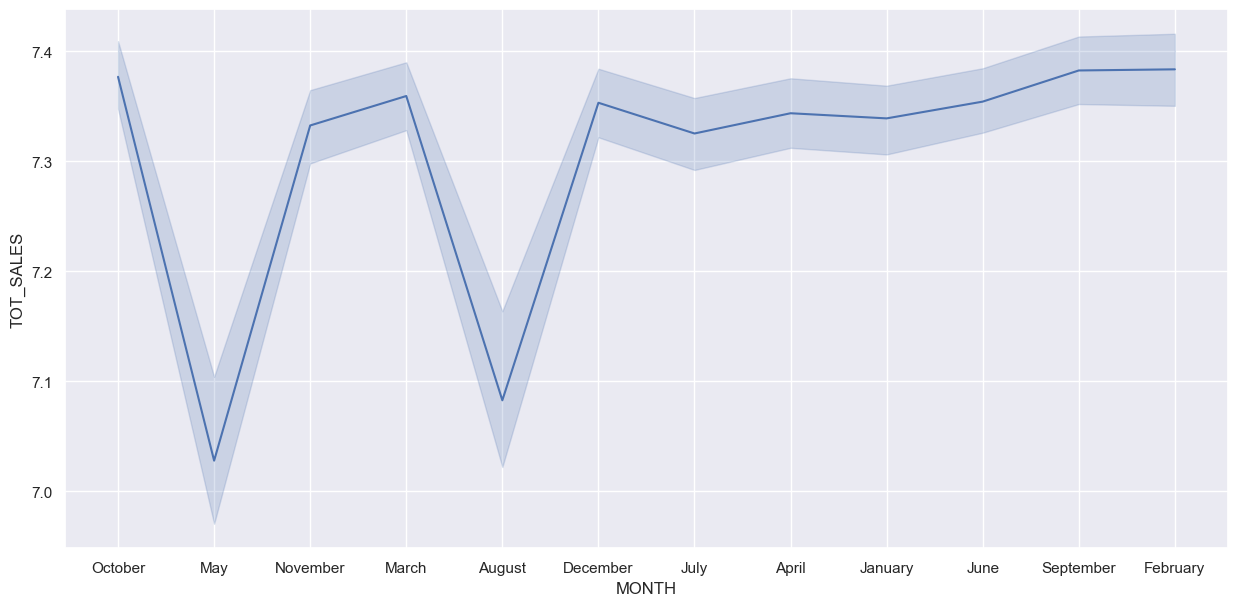

In [38]:
sns.lineplot(df.MONTH, df.TOT_SALES)

In [23]:
df.to_csv('EDA_Quantium_dataset.csv', index=False)